<a href="https://colab.research.google.com/github/erinmcmahon26/Cervical_Cancer_Risk_Assessment/blob/main/CervicalCancerImages_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Upload Kaggle API token

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


# Get Data From Kaggle

In [3]:
!kaggle datasets download -d prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed

100% 6.40G/6.40G [03:31<00:00, 37.0MB/s]
100% 6.40G/6.40G [03:31<00:00, 32.5MB/s]


# Unzip Kaggle Data

In [4]:
!unzip cervical-cancer-largest-dataset-sipakmed.zip

Streaming output truncated to the last 5000 lines.
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_12_cyt.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_12_nuc.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_13.bmp  
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_13_cyt.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_13_nuc.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_14.bmp  
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_14_cyt.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/075_14_nuc.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/076_01.bmp  
  inflating: im_Parabasal/im_Parabasal/CROPPED/076_01_cyt.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/076_01_nuc.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/076_02.bmp  
  inflating: im_Parabasal/im_Parabasal/CROPPED/076_02_cyt.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/076_02_nuc.dat  
  inflating: im_Parabasal/im_Parabasal/CROPPED/076_03.bmp  
  inflati

# EDA

In [11]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib.image import imread
# from os import makedirs
# from os import listdir
import os
# from shutil import copyfile
# from random import seed
# from random import random
from PIL import Image
import cv2

import tensorflow as tf
from tensorflow import keras
# import sys
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [12]:
data=[]
labels=[]

height = 64
width = 64
channels = 3
classes = 43
n_inputs = height * width * channels

path1 = "im_Dyskeratotic/im_Dyskeratotic/CROPPED/"
path2 = "im_Koilocytotic/im_Koilocytotic/CROPPED/"
path3 = "im_Metaplastic/im_Metaplastic/CROPPED/"
path4 = "im_Parabasal/im_Parabasal/CROPPED/"
path5 = "im_Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/"

path = [path1, path2, path3, path4, path5]

# print(Class)
i = 0
for p in path:
    Class=os.listdir(p)
    for a in Class:
        if(a[-1] == 'p'):
            labels.append(i)
            try:
                image=cv2.imread(p+a)
                image_from_array = Image.fromarray(image, 'RGB')
                size_image = image_from_array.resize((height, width))
                data.append(np.array(size_image))
            except AttributeError:
                print(" ")
    i+=1

# Converting data to ndarray - 
labels = np.array(labels)
data = np.array(data)

print(data.shape)
print(labels.shape)
print(labels)

# Randomize the order of the input images
s = np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data = data[s]
labels = labels[s]


(4049, 64, 64, 3)
(4049,)
[0 0 0 ... 4 4 4]


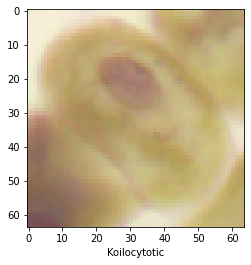

In [19]:
categories = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])
    
show_the_image(0)

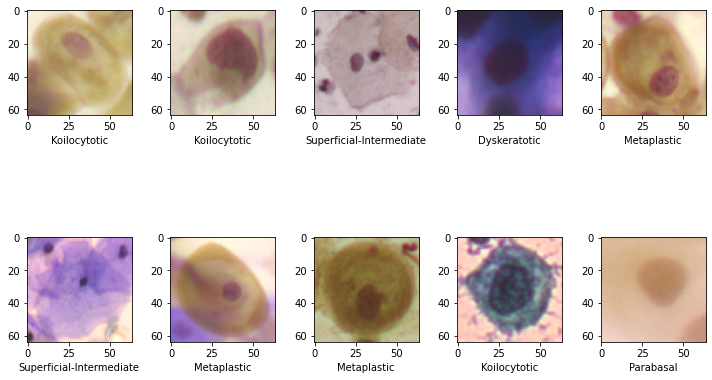

In [98]:
for i in range(10):
  # plt.subplot(330 + 1 + i) # rows, cols, idx
  plt.subplot(3, 5, i+1) # rows, cols, idx
  plt.imshow(data[i])
  plt.xlabel(categories[labels[i]])
  plt.tight_layout()
  plt.rcParams["figure.figsize"] = (10, 15)

In [105]:
for p in path:
  print(p, len(os.listdir(p)))

im_Dyskeratotic/im_Dyskeratotic/CROPPED/ 2439
im_Koilocytotic/im_Koilocytotic/CROPPED/ 2475
im_Metaplastic/im_Metaplastic/CROPPED/ 2379
im_Parabasal/im_Parabasal/CROPPED/ 2361
im_Superficial-Intermediate/im_Superficial-Intermediate/CROPPED/ 2493
